<a href="https://www.kaggle.com/code/hsinyouwu/gender-classification-computer-vision?scriptVersionId=187341801" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Gender Classifier**

In [1]:
from fastai.vision.all import *

In [2]:
# import data
path = Path('/kaggle/input/gender-classification-dataset')
path.ls()

(#2) [Path('/kaggle/input/gender-classification-dataset/Validation'),Path('/kaggle/input/gender-classification-dataset/Training')]

In [3]:
# create a custom splitter function
def custom_splitter(files):
    train_idx = [i for i, file in enumerate(files) if path/'Training' in file.parents]
    valid_idx = [i for i, file in enumerate(files) if path/'Validation' in file.parents]
    return train_idx, valid_idx

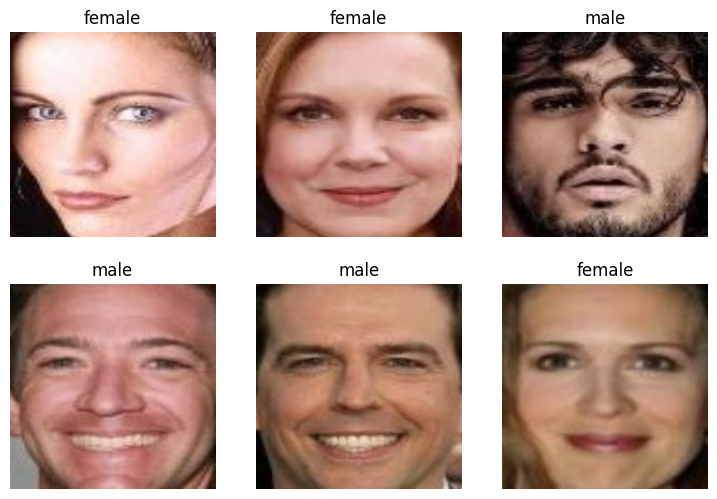

In [4]:
# create dls
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = custom_splitter,
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [5]:
# create learner
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.225537,0.174440,0.065413,02:53


epoch,train_loss,valid_loss,error_rate,time
0,0.105939,0.071578,0.024036,02:18


In [6]:
# try making predictions
test_male = get_image_files(path/'Validation'/'male')[5]
test_female = get_image_files(path/'Validation'/'female')[5]

print(learn.predict(test_male))
print(learn.predict(test_female))

('male', tensor(1), tensor([5.9459e-04, 9.9941e-01]))


('female', tensor(0), tensor([0.7705, 0.2295]))


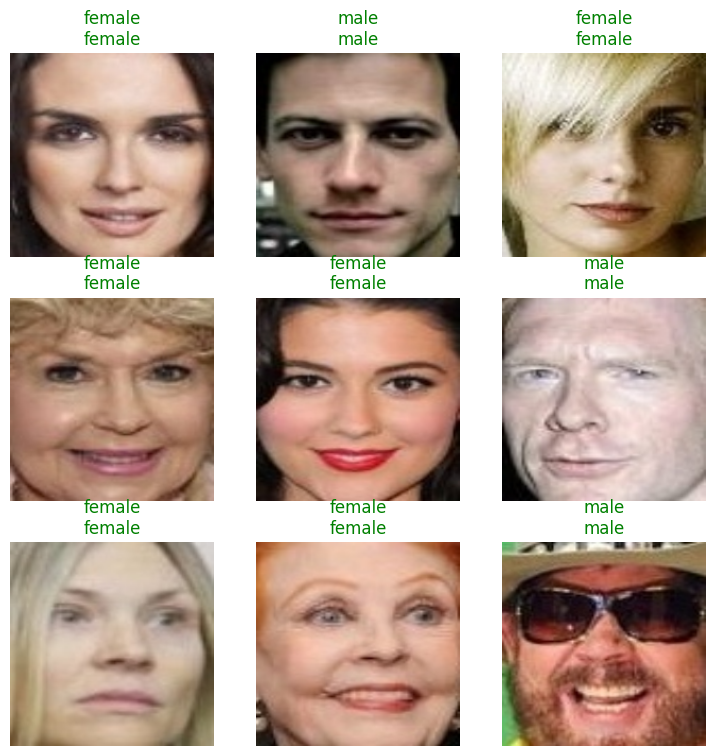

In [7]:
# try making more predictions
learn.show_results()